In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from __future__ import division

import os

import numpy as np
import math as m

from astropy import constants as const
from astropy.stats import sigma_clip

from glob import glob

import reduce_dblspec 
import pipeline

from astropy.io import fits
from astropy import units as u
from astropy import modeling
from astropy.table import Table
from photutils import centroid_com
from scipy import asarray as ar,exp
from astropy.modeling import models, fitting



from astropy import modeling
from astropy import constants as cnst

# Dispersion Solutions
### RED 1.0"

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


used atlas plot limits for Red side


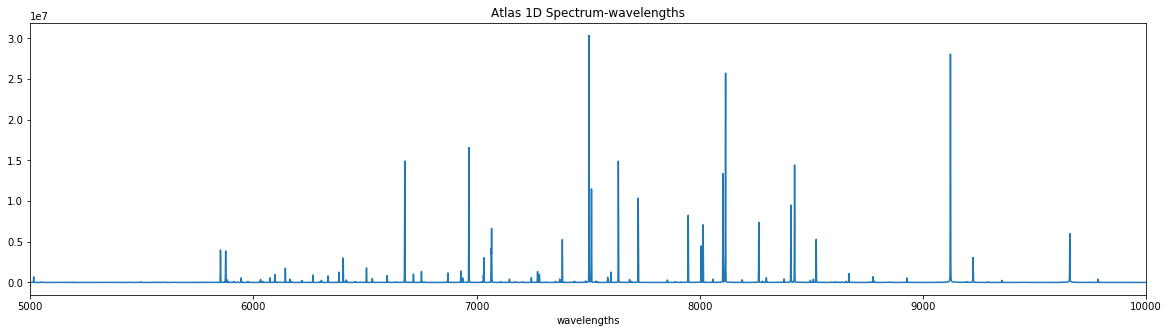

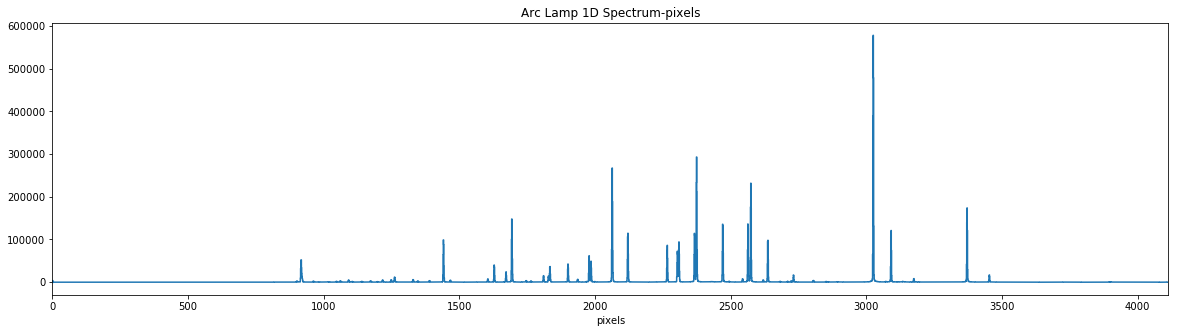

In [2]:
#nameing all the datafiles needed
flatid = 'DomeFlat'



all_side_files_red10 = 'DoubleSpec/20170519/red*.fits' #redside
atlasfiles_red10 = fits.open('henear.fits') #NOAO atlas #redside
arcfiles_red10 = 'DoubleSpec/20170519/red0012.fits' #redside
linelist_red10 = reduce_dblspec.HENEAR_LINE_LIST

specset_red10 = pipeline.dispersion(all_side_files_red10, atlasfiles_red10, arcfiles_red10, linelist_red10,flatid)

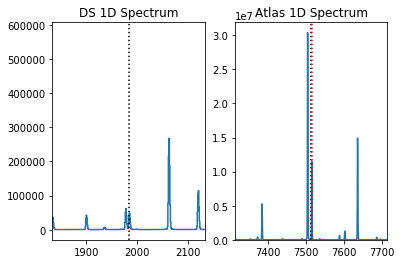

In [3]:
#collecting guesses of matching lines from above graphs

#entering(px,wl)guesses & data
pipeline.guess_plot(1983,7513,specset_red10) #outputs (pixel guess, nearest wl/id in linelist)

#collect guesses here ~5 seems good
pixel_guesses_red10 = [2373,2062,1672,3370,3090,2573,1977,1983]#3024
atlas_lines_red10 = [8115.311,7635.106,7032.4131,9657.7863,9224.4992,8424.6475,7503.8691,7514.6518]#9122.9674,
guesses_red10 = list(zip(pixel_guesses_red10, atlas_lines_red10)) #making tuples to pass into fcn later

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


chose ds for redside
chose guesses for redside
Skipping line HeI at wl=3187.745 - out of wl min/max
Skipping line ArII at wl=3307.2283 - out of wl min/max
Skipping line ArI at wl=3319.3446 - out of wl min/max
Skipping line ArII at wl=3350.9243 - out of wl min/max
Skipping line HeI at wl=3354.55 - out of wl min/max
Skipping line ArI at wl=3373.4823 - out of wl min/max
Skipping line ArII at wl=3376.4359 - out of wl min/max
Skipping line ArII at wl=3388.5309 - out of wl min/max
Skipping line NeII at wl=3397.866 - out of wl min/max
Skipping line ArI at wl=3406.1804 - out of wl min/max
Skipping line ArII at wl=3414.4583 - out of wl min/max
Skipping line NeI at wl=3417.9035 - out of wl min/max
Skipping line ArII at wl=3421.6107 - out of wl min/max
Skipping line ArII at wl=3454.0952 - out of wl min/max
Skipping line ArII at wl=3464.1272 - out of wl min/max
Skipping line NeI at wl=3472.5711 - out of wl min/max
Skipping line ArII at wl=3476.7474 - out of wl min/max
Skipping line ArII at wl=3480

Failed to find line ArI at wl=8006.1567: "Guessed line's peak to base ratio is 8.966751095840813, which is less than 10"
Failed to find line ArI at wl=8014.7857: "Guessed line's peak to base ratio is 9.318175819338679, which is less than 10"
Failed to find line KrI at wl=8059.5038: "Guessed line's peak to base ratio is 1.0071667230703627, which is less than 10"
Failed to find line ArI at wl=8103.6931: "Guessed line's peak to base ratio is 6.8475247205142615, which is less than 10"
Found line ArI at wl=8115.311
Clipped 0 lines
Failed to find line KrI at wl=8190.0543: "Guessed line's peak to base ratio is 0.989665427804739, which is less than 10"
Failed to find line ArI at wl=8264.5225: "Guessed line's peak to base ratio is 7.871156695322143, which is less than 10"
Failed to find line KrI at wl=8281.0495: "Tried to find peak at 2481.0913838718748 but it's in a valley, not a peak"
Failed to find line NeI at wl=8377.6065: "Guessed line's peak to base ratio is 6.2129642202481365, which is l

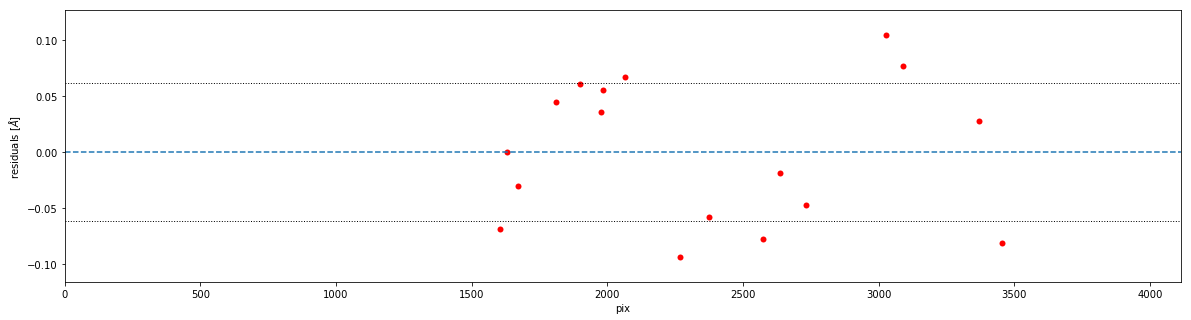

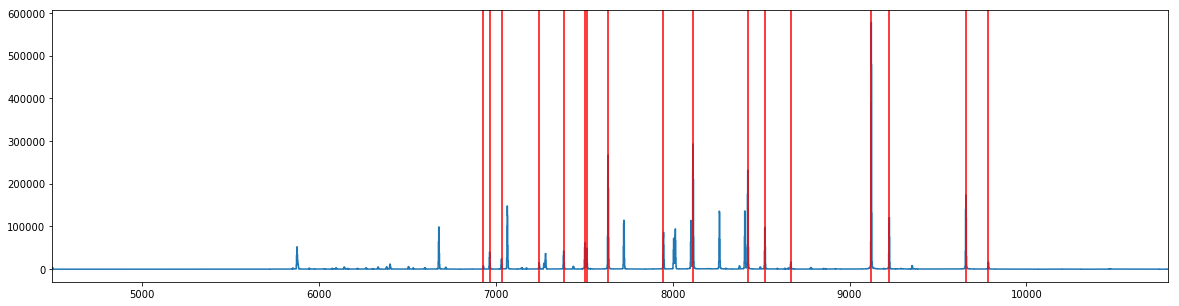

In [4]:
#generating more line matches based on guesses above and checking residuals to see if this is a good enough solution

ds_red10 = pipeline.goodness_of_matches(arcfiles_red10,guesses_red10,all_side_files_red10,atlasfiles_red10,linelist_red10,flatid)

# Blue 1.0"

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


used atlas plot limits for Blue side


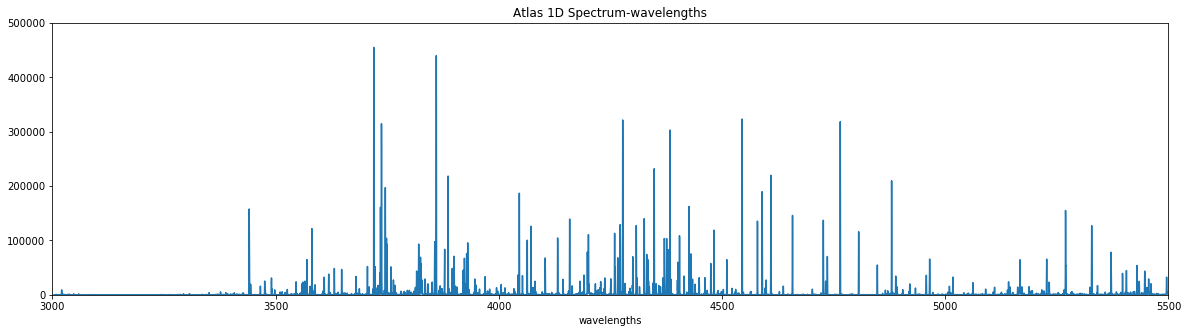

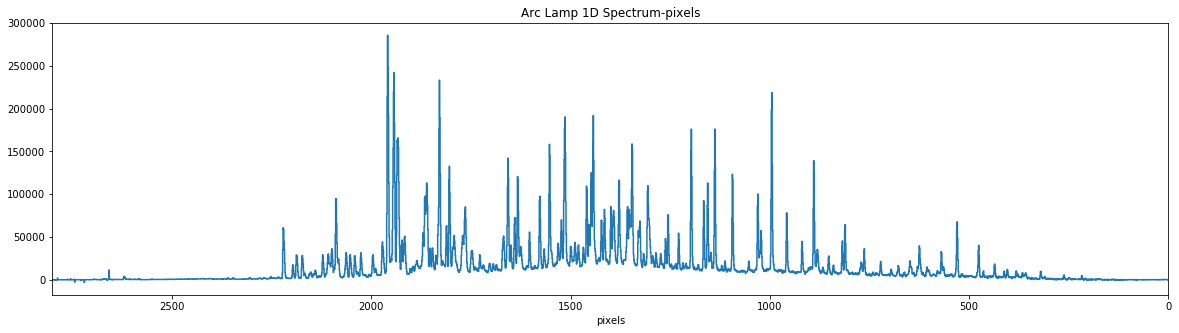

In [5]:
all_side_files_blue10 = 'DoubleSpec/20170519/blue*.fits' #blueside
atlasfiles_blue10 = fits.open('fear.fits') #NOAO atlas #blueside
arcfiles_blue10 = 'DoubleSpec/20170519/blue0011.fits' #blueside
linelist_blue10 = reduce_dblspec.FEAR_LINE_LIST #must be in this form cant use'fear.dat'--debug later

specset_blue10 = pipeline.dispersion(all_side_files_blue10, atlasfiles_blue10, arcfiles_blue10, linelist_blue10,flatid)

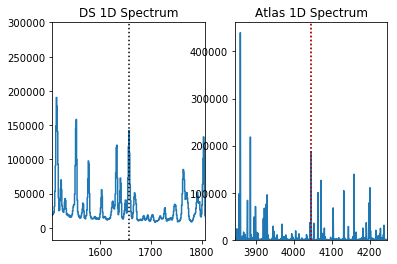

In [6]:
pipeline.guess_plot(1656,4046,specset_blue10) #(px,wl)

#collect guesses here but comment them out to see output of matches from line above
pixel_guesses_blue10 = [529,995,2088,1958] #,1657
atlas_lines_blue10 = [5269.5366,4764.8646,3581.1925,3719.9346] #,4045.8130

guesses_blue10 = list(zip(pixel_guesses_blue10, atlas_lines_blue10)) #making tuples to pass into fcn later

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


chose ds for blueside
chose guesses for blueside
Failed to find line FeI at wl=3020.6391: "Tried to find peak at 2623.7225827443517 but it's in a valley, not a peak"
Failed to find line FeI at wl=3024.0325: "Guessed line's peak to base ratio is 4.533538339451221, which is less than 5"
Failed to find line FeI at wl=3037.3887: "Guessed line's peak to base ratio is 1.2893355075313695, which is less than 5"
Failed to find line FeI at wl=3047.6043: "Tried to find peak at 2597.501394839253 but it's in a valley, not a peak"
Failed to find line FeI at wl=3057.4456: "Tried to find peak at 2587.9457522100497 but it's in a valley, not a peak"
Failed to find line FeI at wl=3059.0856: "Guessed line's peak to base ratio is 2.794947833283675, which is less than 5"
Failed to find line FeI at wl=3225.785: "Guessed line's peak to base ratio is 1.4190035946857171, which is less than 5"
Failed to find line ArII at wl=3243.6887: "Guessed line's peak to base ratio is 1.4129564785379853, which is less than 5

Failed to find line ArI at wl=4044.4179: "Guessed line's peak to base ratio is 2.9822565901403584, which is less than 5"
Failed to find line FeI at wl=4045.813: "Guessed line's peak to base ratio is 2.9822565901403584, which is less than 5"
Failed to find line ArII at wl=4052.9208: "Guessed line's peak to base ratio is 2.654010032130634, which is less than 5"
Found line FeI at wl=4063.5939
Clipped 0 lines
Failed to find line ArII at wl=4103.9121: "Guessed line's peak to base ratio is 3.840732083696764, which is less than 5"
Failed to find line FeI at wl=4118.5442: "Guessed line's peak to base ratio is 1.562007151236431, which is less than 5"
Found line ArII at wl=4131.7235
Clipped 0 lines
Failed to find line FeI at wl=4143.8688: "Guessed line's peak to base ratio is 4.223757083884537, which is less than 5"
Found line ArI at wl=4158.5905
Clipped 0 lines
Failed to find line ArI at wl=4164.1795: "Guessed line's peak to base ratio is 1.2968079720972707, which is less than 5"
Found line FeI

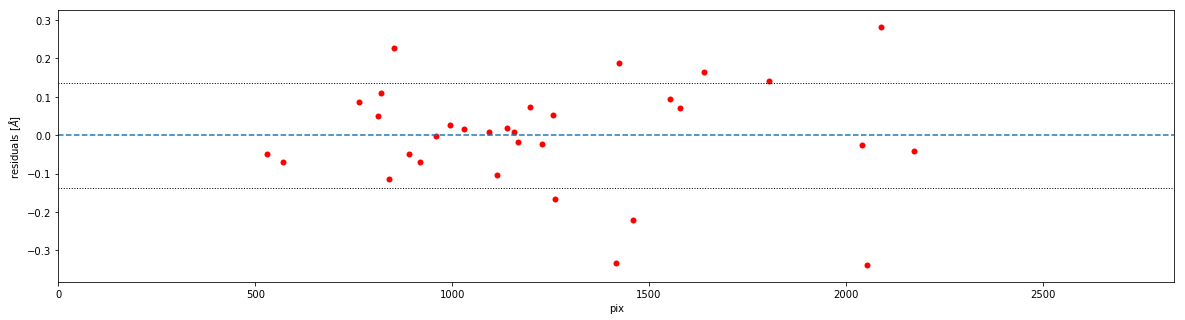

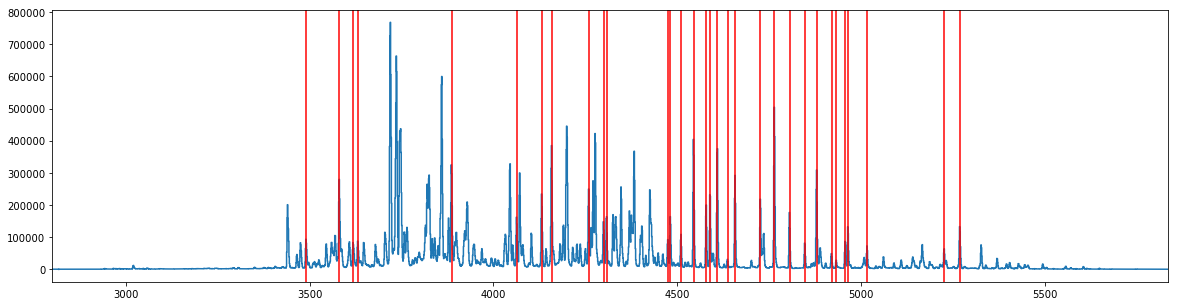

In [7]:
#generating more line matches based on guesses above and checking residuals to see if this is a good enough solution
#again BAD residuals .3 but good enough for a wrong DS
ds_blue10 = pipeline.goodness_of_matches(arcfiles_blue10,guesses_blue10,all_side_files_blue10,atlasfiles_blue10,linelist_blue10,flatid) #yay looks good FINALLY!!

# Checking DS quality via overlay of Atlas & Arc for BLUE SIDE

ARC_ARRAY INFO: type <class 'numpy.ndarray'> shape (1,) len 1 whole thing [<matplotlib.lines.Line2D object at 0x113a69198>]
ARC_FLUX INFO: type <class 'numpy.ndarray'> shape (2835,) len 2835 whole thing [ 1522852.  1495706.  1496556. ...,  1492826.  1492892.  1492744.]
CONCLUSION of for loop is that arc_array isnt going to be useable for this test.....use arc_flux BUT values seem high


/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."


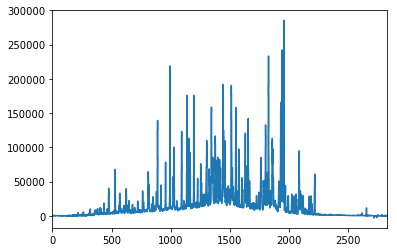

In [8]:
#getting arc lamp 1d spectrum....uses extract_spectrum from eriks code

#attempts to get arc 1D flux array - also plots below
#FOR REFERENCE: specset_blue10[0] is the DS
arc_array = np.array(specset_blue10[0].plot_spec())


#make arc lamp files a class object
#FOR REFERENCE: arcfiles_blue10 = 'DoubleSpec/20170519/blue0011.fits' #blueside
arc_dblspecimage = reduce_dblspec.DoubleSpecImage(arcfiles_blue10)

#should make arc into 1d spectrum (w/unc)
arc_flux, arc_unc = arc_dblspecimage.extract_spectrum([0,460])


#testing if any of above gave correct arc flux
print('ARC_ARRAY INFO:','type', type(arc_array),'shape',np.shape(arc_array),'len',len(arc_array),'whole thing',arc_array)
print('ARC_FLUX INFO:','type',type(arc_flux),'shape',np.shape(arc_flux),'len',len(arc_flux),'whole thing',arc_flux)

#for i in arc_array:
#    print('arc_array i:',i)
print('CONCLUSION of for loop is that arc_array isnt going to be useable for this test.....use arc_flux BUT values seem high')

estimated continuum val for ARC; flux = 1492719.0 unc = 69598.7629703


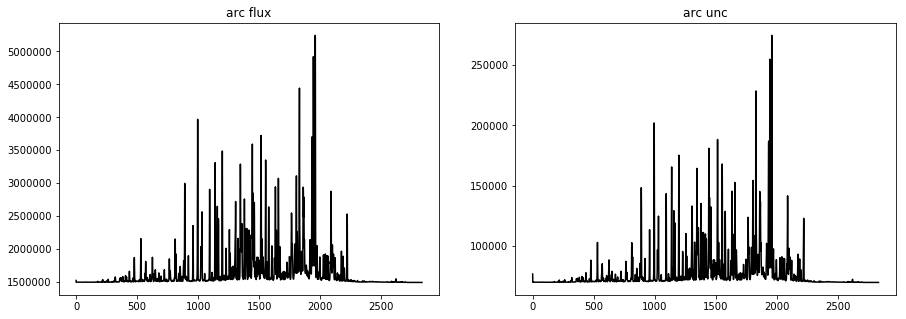

In [9]:
#plotting arc lamp flux & uncs....from extract_spectrum


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(arc_flux,color='k');
ax1.set_title('arc flux')
ax2.plot(arc_unc,color='k')
ax2.set_title('arc unc')


#continuum subtracting arc_flux (& arc_unc b/c arc_flux is crazy high still)
continuum_est = np.min(arc_flux) #flux continuum
continuum_est_unc = np.min(arc_unc) #unc continuum

print('estimated continuum val for ARC; flux =',continuum_est,'unc =',continuum_est_unc)

Filename: DoubleSpec/20170519/blue0011.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      57   (460, 2835)   int16 (rescales to uint16)   
info None
shape of arc lamp 2D data (460, 2835)
new shape of arc lamp data as a 1D spec  (2835,)


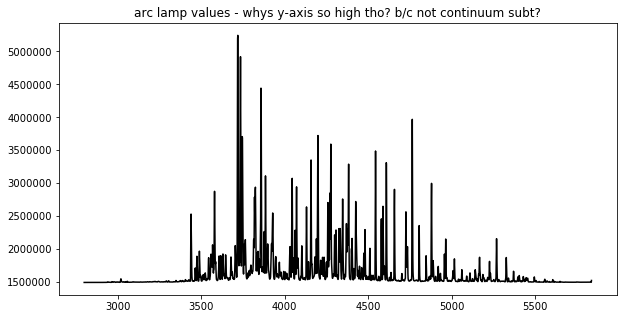

In [10]:
#arc lamp 1D spectrum w/o using extract_spectrum module

#def arc lamp files NEED THIS LINE
arc_blue10 = fits.open('DoubleSpec/20170519/blue0011.fits') #blueside
print('info',arc_blue10.info())


#converting full CCD spectral pixels into correct wavelenths
wl_array = ds_blue10.pixtowl(np.arange(len(arc_blue10[0].data)))

#need to convert 2D arc lamp data files into 1D by SUMing spatial rows/collapse along wl
print('shape of arc lamp 2D data',np.shape(arc_blue10[0].data.T)) #transposed b/c blue side
spec = np.sum(arc_blue10[0].data.T, axis=0) #sums all spatial rows to get one flux per wl
print('new shape of arc lamp data as a 1D spec ',np.shape(spec)) #checking correct wl length


#plotting arc lamp 1d spectrum
plt.figure(figsize=(10,5))
plt.plot(wl_array, spec,color='k') #sums all arc lamp data spatial rows
plt.title('arc lamp values - whys y-axis so high tho? b/c not continuum subt?')
#plt.ylim(0,300000)
#plt.xlim(3000,5500)

##print('shape',np.shape(arc_blue10[0].data),'wl array' , wl_array)



In [11]:
#troubleshooting 
#but means spec should be right & match arc_flux from extract_spectrum


#for i in arc_blue10[0].data:
#    print(i)
print('shape of arc_blue10[0] is 2835(wl) arrays of 460(flux) values')
print('shape of 2D arc lmap data',np.shape(arc_blue10[0].data),'type of 2d arc lamp data',type(arc_blue10[0].data)) #2835,460
#first array of 460 length has a first value of 3238, 3232, 32003
#second array of 460 length has a first valueof 3250, 3246, 3366


#testing indexing embedded arrays
#print(arc_blue10[::][0].data)
#print([arc_blue10[0].data])
#print(arc_blue10[0].data[1]) #change 1 to index thru wl arrays of spatial values
#print(arc_blue10[0].data[1][0]) #change second 0 to index thru spatial values of a wl array
print('un.T matches .T',arc_blue10[0].data[::,0])# to get all of the 1st elements from each wl array
#print('first len',len(arc_blue10[::][0].data),'second len',len([arc_blue10[0].data]))
#print('hows transpose work?',arc_blue10[0].data.T) BEST, need to sum along axis=0
print('.T matches un.T',arc_blue10[0].data.T[0],'shape of transposed array',np.shape(arc_blue10[0].data.T))

shape of arc_blue10[0] is 2835(wl) arrays of 460(flux) values
shape of 2D arc lmap data (2835, 460) type of 2d arc lamp data <class 'numpy.ndarray'>
un.T matches .T [3238 3250 3250 ..., 3247 3244 3243]
.T matches un.T [3238 3250 3250 ..., 3247 3244 3243] shape of transposed array (460, 2835)


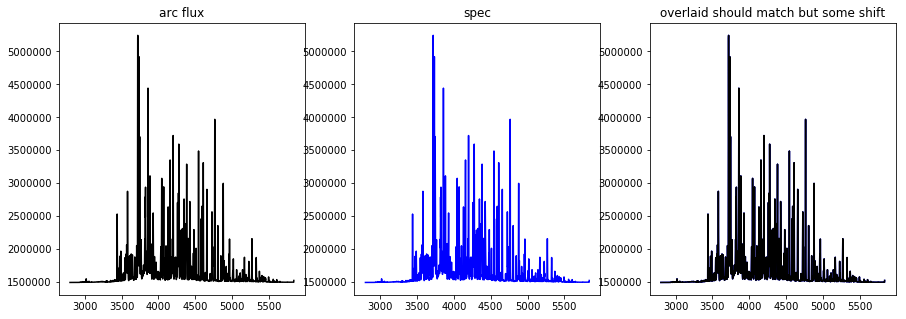

In [12]:
#comparing arc_flux to spec

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
ax1.plot(wl_array,arc_flux,color='k'); #original
ax1.set_title('arc flux')
ax2.plot(wl_array, spec.T, color='b') #transposed array
ax2.set_title('spec')
ax3.plot(wl_array,spec.T,color='b')
ax3.plot(wl_array,arc_flux,color='k')
ax3.set_title('overlaid should match but some shift')


(1500000, 2000000)

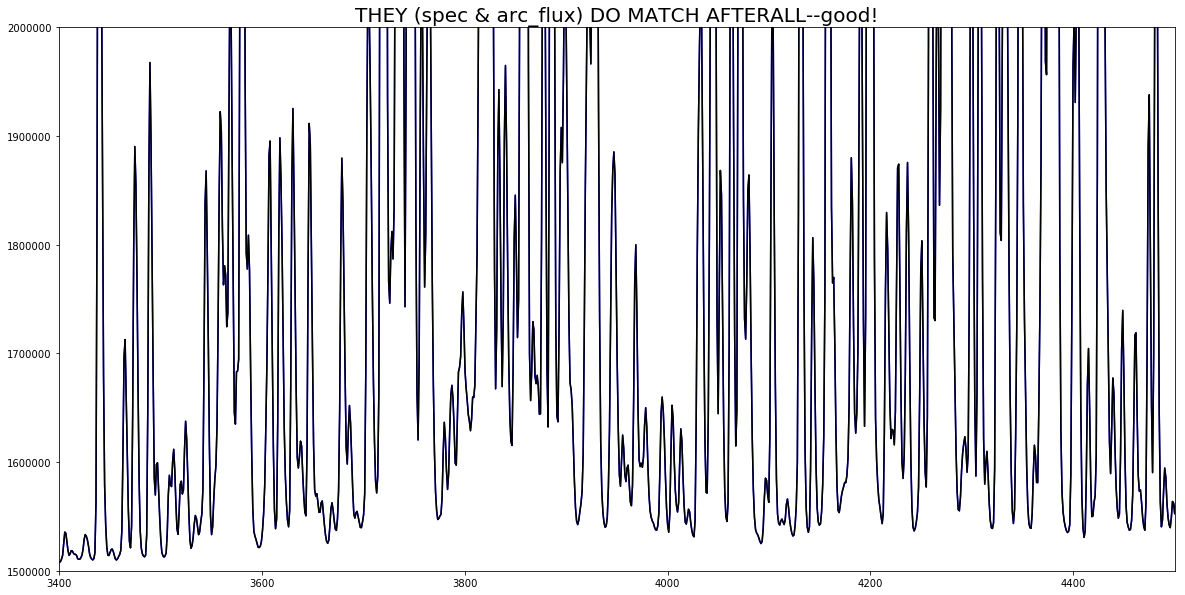

In [13]:
#exploring difference btwn arc_flux (w/ extract_spectrum) and spec (w/o extract_spectrum)

plt.figure(figsize=(20,10))
plt.plot(wl_array,spec.T,color='b')
plt.plot(wl_array,arc_flux,color='k')
plt.title('THEY (spec & arc_flux) DO MATCH AFTERALL--good!',fontsize=20)
plt.xlim(3400,4500) #zooming to see if non-match is that bad
plt.ylim(1500000,2000000)#zooming to see if non-match is that bad

subtracting value of 1641611.19506 but this isnt the problem b/c this is way low


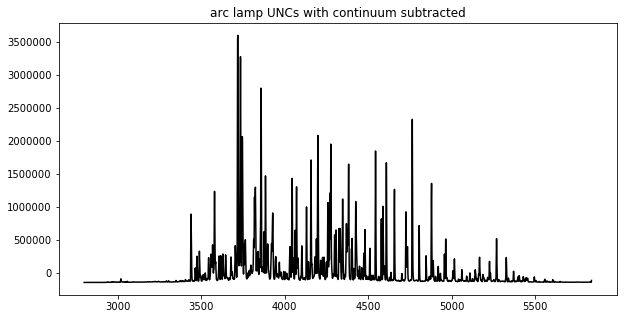

In [14]:
#quick & dirty subtraction of instr. noise  from arc lamp data
#maybe too dirty .....use mean or min?


#for reference
#continuum_est = np.min(arc_flux) #flux continuum
#continuum_est_unc = np.min(arc_unc) #unc continuum
continuum_est_spec = np.mean(spec) #spec inst noise, should be same as continuum_est tho
print('subtracting value of', continuum_est_spec,'but this isnt the problem b/c this is way low')

#subtracting continuum
subt_arc_flux = arc_flux - continuum_est #not sure if flux or unc
subt_unc = arc_unc - continuum_est_unc #not sure if flux or unc 
subt_spec = spec - continuum_est_spec

#plotting ARC lamp
plt.figure(figsize=(10,5))
plt.title('arc lamp UNCs with continuum subtracted')
plt.plot(wl_array, subt_spec,color='k') #ymax ~3,500,000
#plt.plot(wl_array, subt_unc,color='k') #ymax ~ 200,000
#plt.plot(wl_array, subt_arc_flux,color='k') #ymax ~ 3,500,000
#compare y-axis max with atlas y-axis max of ~450,000; otherwise SAME Shape/Pattern of emissions

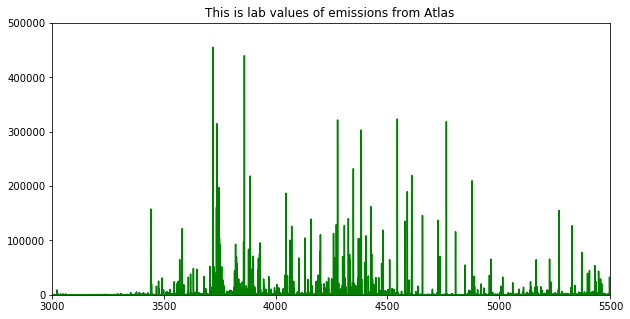

In [15]:
#atlas emission values from lab 

#plt.plot(atlasfiles_blue10[0].data, color='g')
#for i in atlasfiles_blue10[0].data:
#    print(i)
plt.figure(figsize=(10,5))
plt.title('This is lab values of emissions from Atlas ')
plt.xlim(3000,5500) #same lims as cell 5 when started making ds
plt.ylim(0,500000)
plt.plot(specset_blue10[1],specset_blue10[2],color='g')

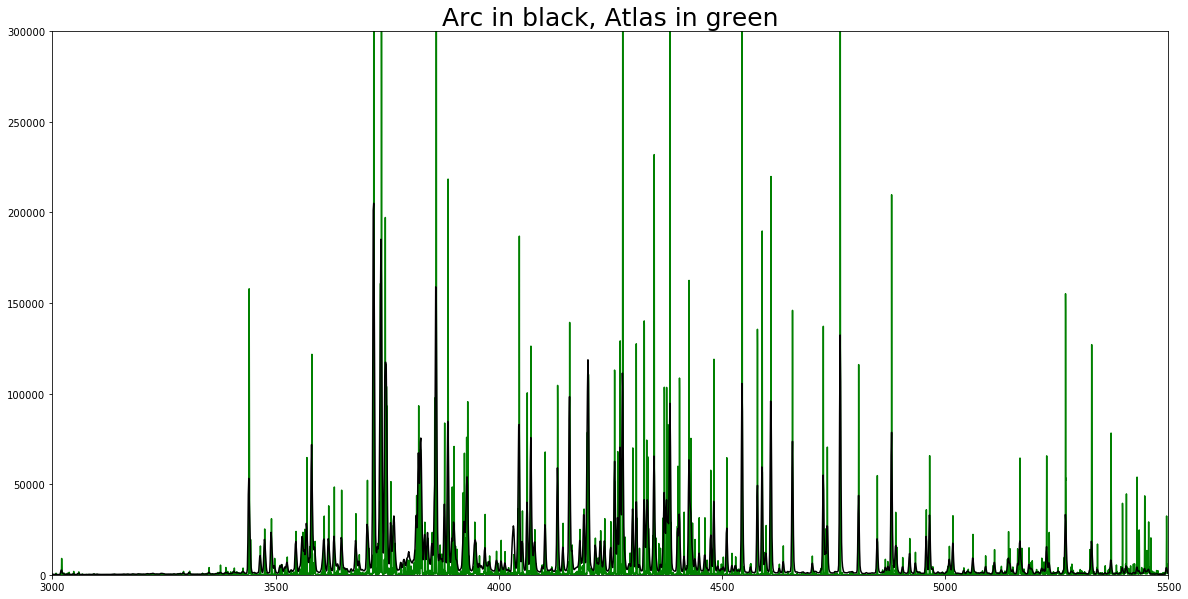

In [16]:
#atlas over arc #### uses unc

#magic inside pipeline.py that gets lab values to plot
#    header = atlasfiles[0].header    
#    specnoao = atlasfiles[0].data
#    wlnoao = header['CRVAL1'] + header['CD1_1']*(np.arange(len(specnoao)) - header['CRPIX1'] + 1)


plt.figure(figsize=(20,10))
plt.plot(specset_blue10[1],specset_blue10[2],color='g') #atlas lab values of lines 
plt.plot(wl_array,subt_unc, color='k'); #arc lamp data



plt.xlim(3000,5500)
plt.ylim(0,300000)
plt.title('Arc in black, Atlas in green',fontsize=25)

still good agreement


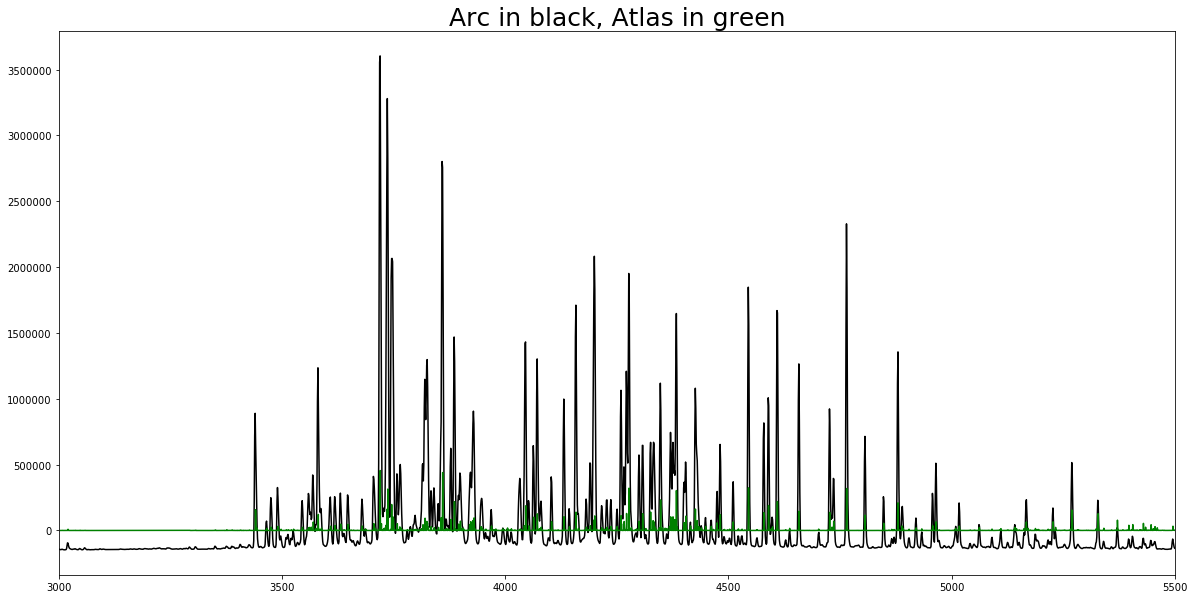

In [17]:
#atlas over arc #### uses spec 


#replotting
plt.figure(figsize=(20,10))
plt.plot(wl_array,subt_spec, color='k'); #arc lamp data
plt.plot(specset_blue10[1],specset_blue10[2],color='g') #atlas lab values of lines 

plt.xlim(3000,5500)
#plt.ylim(0,300000)
plt.title('Arc in black, Atlas in green',fontsize=25)
print('still good agreement')

# StarTrek-1

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


3 target files located
choose 2D spec for blueside
choose 1D target spec axis limits for blueside


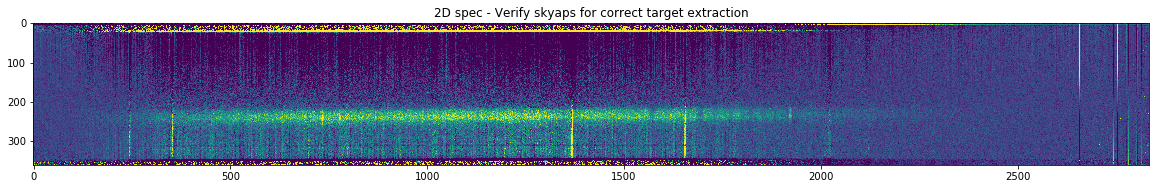

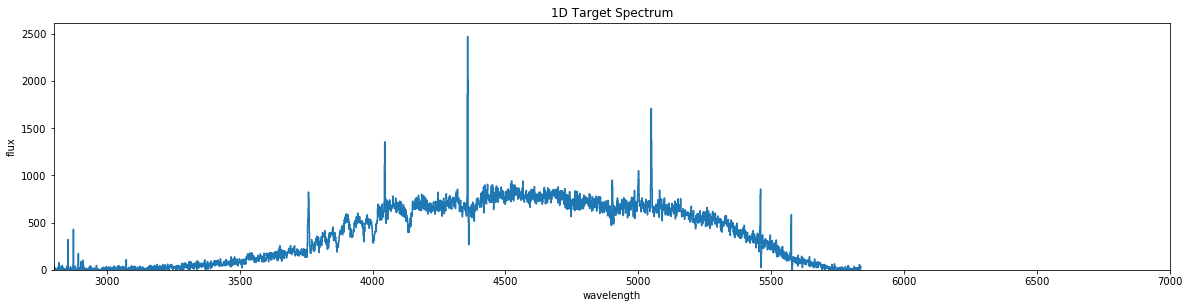

In [18]:
#BLUE
#FIXED-this particular one has a problem b/c it was misnamed '57607497515484-StarTrek' instead of '57607497318756-StarTrek'
targetID_blue10_ST1 = '57607497318756-StarTrek'
skyaps_blue10 = [(160,200),(285,355)]
all_side_files_target_blue = 'DoubleSpec/20170519/blue*.fits' #BLUEside
vmax=40
vmin=-10
model='linear'
flatid='DomeFlat'
specaps=(215,250)
flux_ST1,unc_ST1,subimg_ST1 = pipeline.sky_subtract(targetID_blue10_ST1,skyaps_blue10,ds_blue10,all_side_files_blue10,atlasfiles_blue10,all_side_files_target_blue,flatid,specaps,vmax,vmin,model)



/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


3 target files located


choose 2D spec for redside
choose 1D target spec axis limits for redside


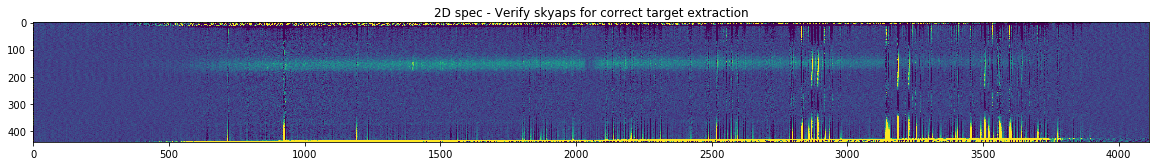

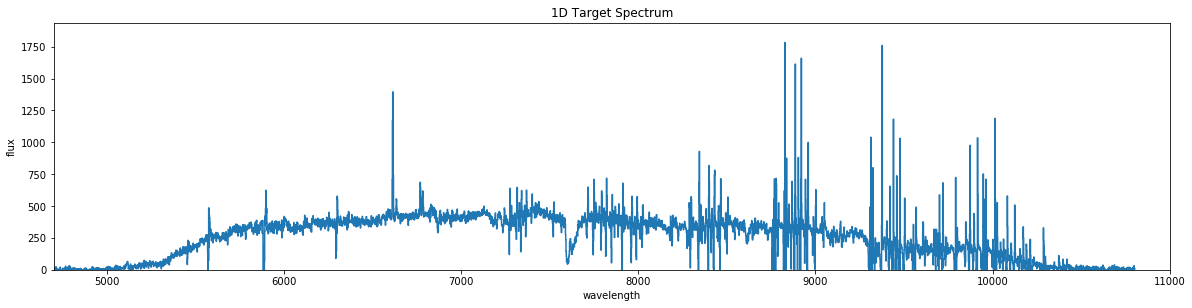

In [19]:
#RED
targetID_red10_ST1 = '57607497318756-StarTrek'
skyaps_red10 = [(75,110),(210,355)]
all_side_files_target_red = 'DoubleSpec/20170519/red*.fits' #redside
vmax=40
vmin=-10
flatid='DomeFlat'
specaps=(130,170)
#model=('poly',4)
model = ('cheb',2)
flux_ST1_red,unc_ST1_red, comb_ST1_red = pipeline.sky_subtract(targetID_red10_ST1,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target_red,flatid,specaps,vmax,vmin,model)



# Starting 2nd reduction technique for rot.curves ST-1
##  BLUE SIDE  OIII line ----------------------------------------------

In [20]:
#need this for 2d only extraction (pipeline modification)
def sky_subtract(comb,skyaps,model):    
    #plotting 2D to get skyaps right around the target
    plt.figure(figsize=(10,25)) #setting up fig size
    value = model[1]
    if model == 'linear':
        subimg, models = comb.subtract_sky(skyaps, skymodel=modeling.models.Linear1D(1,0)) #(1,0)
    elif model == ('poly',value):
        subimg, models = comb.subtract_sky(skyaps, skymodel=modeling.models.Polynomial1D(value)) #Linear1D(1/10,10)) #(1,0)
    elif model == ('combined',value):
        mymodel=(modeling.models.Polynomial1D(value) + modeling.models.Linear1D(1,0))
        subimg, models = comb.subtract_sky(skyaps, skymodel=mymodel)
    elif model == None:
        subimg, models = comb.subtract_sky(skyaps, skymodel=None)#subtracts mean
    else:
        print ("Model type or polynomial degree not recognized")
    return (subimg, comb, models)    #subtracted2D, original, fitted models per row

(776, 783)

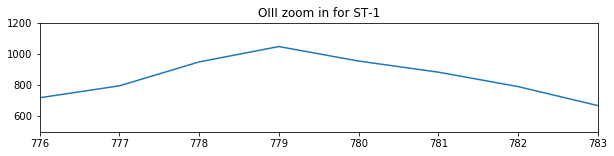

In [21]:
#quick spectral pix range estimate from 1D spectrum
plt.figure(figsize=(10,2))
plt.plot(flux_ST1)
plt.title('OIII zoom in for ST-1')
plt.ylim(500,1200)
#plt.xlim(1365,1374) #this is for the sky line
plt.xlim(776,783) #BELIEVE THIS IS 4960 ANGSTROM OIII LINE
#plt.xlim(730,740) #think this is the 5007 OIII line

In [22]:
#setup to extract 2D only (uses pipeline modification)


#stacking all those instrument-noise-subtracted target data files-help increase s/n 
atlasfiles = fits.open('fear.fits') #use for creating dispersion solution later 

#determing what instumentation noise is
flats = [reduce_dblspec.DoubleSpecImage(fn).overscan_sub_and_trim() for fn in 
          reduce_dblspec.find_all_obj(flatid,'DoubleSpec/20170519/blue*.fits')[:10]] #DO I WANNA KEEP AS ONLY LAST 10???
nfl = reduce_dblspec.create_normalized_flat(flats)   
header = atlasfiles[0].header    
    
#locating all files w/ the target & instrumentation noise subtraction
specs = [reduce_dblspec.DoubleSpecImage(fn).overscan_sub_and_trim().flatten(nfl) 
          for fn in reduce_dblspec.find_all_obj(targetID_blue10_ST1,all_side_files_target_blue)]
#specs is the inst. noise subtracted group of files with data from target    
    
print("This is lenspecs:",len(specs))
comb = reduce_dblspec.combine_imgs(specs) #comb-all files data from target stacked
#model=('poly',3)
model=('linear')


subimg2, comb2, fitmodels = sky_subtract(comb,skyaps_blue10,model)
#subimg2 is sky-subtracted, instumentation noise subtracted, 

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


This is lenspecs: 3


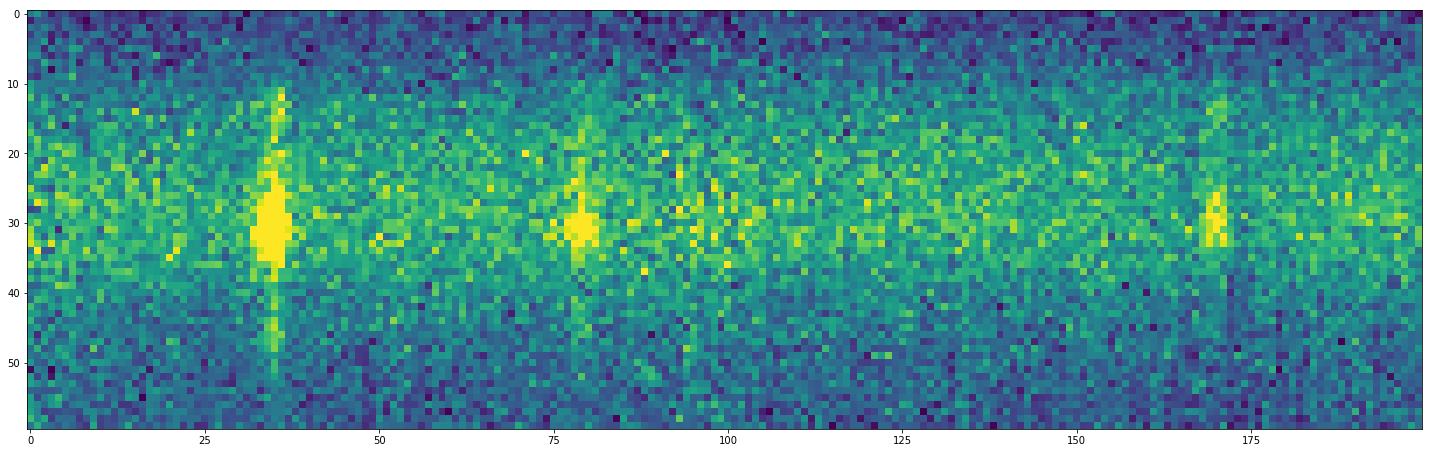

In [23]:
#2d OIII region in pixels (from pipeline modification)

plt.figure(figsize=(25,25))
#testingthis=subimg2.data[1363:1378,155:280] #[spectralrange,spatialrange]#for blue side
#testingthis=subimg2.data[730:740,210:270] 
testingthis=subimg2.data[700:900,210:270].T #most similar to redside view



vmin=-10
vmax=45
plt.imshow(testingthis,vmin=vmin,vmax=vmax)
#print('SPECTRAL H-alpha wl range in pix: 1289:1295;') #w/o missing 3 wl's , to use with flux data - 3
#print('SPACE Target spatial range in pix space: 105:195')

In [24]:
#quickly setting up redside 2nd reduction only to get a 

atlasfiles_red = fits.open('henear.fits') #use for creating dispersion solution later 

#determing what instumentation noise is
flats_red = [reduce_dblspec.DoubleSpecImage(fn).overscan_sub_and_trim() for fn in 
          reduce_dblspec.find_all_obj(flatid,'DoubleSpec/20170519/red*.fits')[:10]] #DO I WANNA KEEP AS ONLY LAST 10???
nfl_red = reduce_dblspec.create_normalized_flat(flats_red)   
header_red = atlasfiles_red[0].header    
    
#locating all files w/ the target & instrumentation noise subtraction
specs_red = [reduce_dblspec.DoubleSpecImage(fn).overscan_sub_and_trim().flatten(nfl_red) 
          for fn in reduce_dblspec.find_all_obj(targetID_red10_ST1,all_side_files_target_red)]
#specs is the inst. noise subtracted group of files with data from target    
    
print("This is lenspecs:",len(specs_red))
comb_red = reduce_dblspec.combine_imgs(specs_red) #comb-all files data from target stacked
#model=('poly',3)
model_red=('linear')


subimg2_red, comb2_red, fitmodels_red = sky_subtract(comb_red,skyaps_red10,model_red)

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


This is lenspecs: 3


estimating ha center at pixel 1400, why again does this side not work?? 


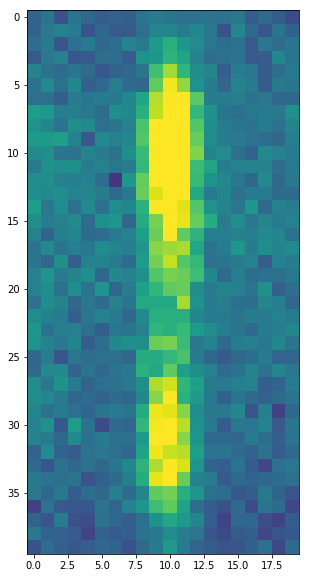

In [25]:
#redside to get halpha for redshift estimates/comparisons

plt.figure(figsize=(15,10))
testingthis_red = subimg2_red.data[140:180,1390:1410] 
vmin=-10
vmax=45
plt.imshow(testingthis_red,vmin=vmin,vmax=vmax)
print('estimating ha center at pixel 1400, why again does this side not work?? ')

# Testing redshifts of lines

In [26]:
#setting up which lines to use for redshift test


#def emission lines in full ccd pix space
emisslins_pixvals = [736,779,869] #brightest emission first

#passing thru ds
emisslins_wlvals = np.array(ds_blue10.pixtowl(emisslins_pixvals))
#FOR REFERENCE wl_array = wl array of full ccd space
print(emisslins_wlvals)

#def lab values of emission lines think these are
bright_lines = {'Ha': 6562.801*u.AA, 'Hb':4861.363*u.AA, 'OIIIa':4958.911*u.AA, 'OIIIb':5006.843*u.AA, 'OII':3727*u.AA} # a doublet so this is ballpark} 


#based on values believe I have OIIIb, OIIIa, Hbeta 

[ 5047.14923451  5000.4713981   4902.67246686]


In [27]:
#estimating redshift based on halpha

ha_pix = 1400
halpha_center = ds_red10.pixtowl(ha_pix) *u.Angstrom
print('center',halpha_center)

halpha_z = halpha_center/bright_lines['Ha'] - 1
print('based on ha wl, the redshift should be: ', halpha_z)

center 6615.132006709169 Angstrom
based on ha wl, the redshift should be:  0.0079738829059679


In [28]:
#estimating locations of other lines 

for nm, wl in bright_lines.items():
    print(nm, (1+halpha_z)*wl) #LOOKS REALLY GOOD

Ha 6615.132006709169 Angstrom
Hb 4900.126939325405 Angstrom
OIIIa 4998.452775655116 Angstrom
OIIIb 5046.766979810565 Angstrom
OII 3756.7186615905425 Angstrom


In [29]:
#redshifts of each line b/c they arent exactly on those wls


#too tired to think about amending this for loop, be efficient later, just do it now
#for name in bright_lines:
#    centroid = specutils.analysis.centroid(subspec, regions[name])
#    tab.add_row([name, centroid, bright_lines[name]]) 
    
#tab['z'] = (tab['centroid']/tab['rest']) - 1
#tab

#redshift eqt
def z_fromlin(saga_wl, real_line):
    z = (saga_wl/real_line) - 1
    return z

#saga emissions
hb_saga = 4902.67246686
OIIIa_saga = 5000.4713981
OIIIb_saga = 5047.14923451
#real emission locations
real_hb = 4861.363
real_OIIIa = 4958.911
real_OIIIb = 5006.843

#z of lines
z_hb = z_fromlin(hb_saga, real_hb)
z_oa = z_fromlin(OIIIa_saga, real_OIIIa)
z_ob = z_fromlin(OIIIb_saga, real_OIIIb)

print('Hbeta: ',z_hb)
print('OIIIa: ',z_oa)
print('OIIIb: ',z_ob)

print('hmmmmm kinda close but not really so whats up with that blue side DS??')

Hbeta:  0.008497507151800754
OIIIa:  0.008380952612378145
OIIIb:  0.008050229358100403
hmmmmm kinda close but not really so whats up with that blue side DS??


## SPACE AXIS Galaxy Core using sections around OIII

subimg2 shape: (2835, 360)
flux data shape (61, 2815)
MISSING   20    STARTS    FROM    HERE !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


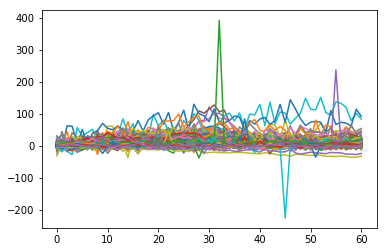

In [30]:
#getting gal core pix...PART ONE ##SPACE CORE

target_aperature=(210,270) #target location in space
target_wl_range=(730,740)

flux_data=[] #empty list to hold target 2d spec
apslc = np.arange(target_aperature[0],target_aperature[1]+1,1) #makes list for which rows to extracct spec from
#print (apslc) #as expected, +1 so doesnt cut off last value


print('subimg2 shape:',np.shape(subimg2.data))#(2835,360)blue#(440, 4114)red
for i in apslc:
    spec = subimg2.data.T[i]#[:-200][i]#subimg2 is sky-subtracted 2D spec #this is every row's spec...cutting wl ossc.s
    #plt.figure(figsize=(20,10))
    #plt.plot(spec)
    #print('first spec',np.shape(spec))
    #need to change if suming multiple pixel rows
    #print(np.shape(spec))
    spec = spec[::][10:-10] #chops first 3 flux values in spectral (wl) direction-crazy osscillations
    #print('second spec',np.shape(spec))
    flux_data.append(spec) #collects a list of every row's spec within the target location
flux_data=np.array(flux_data)
print('flux data shape',np.shape(flux_data))
plt.plot(flux_data);
wl_pix_correction = 20
print('MISSING   20    STARTS    FROM    HERE !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')

flux_data shape (61, 2815)
shape of first section: (61, 25) matches shape of second section: (61, 25)
shape of first section 2d: (61, 1)
shape of second section 2d: (61, 1)
first section centroid x,y: 0.0 30.165579715
second section centroid x,y: 0.0 29.5873277803
This is the average pixel value of the core BEFORE spatial cutout corrections 29.8764537477
Pixel Value of core along spatial axis wrt full CCD size 239.876453748


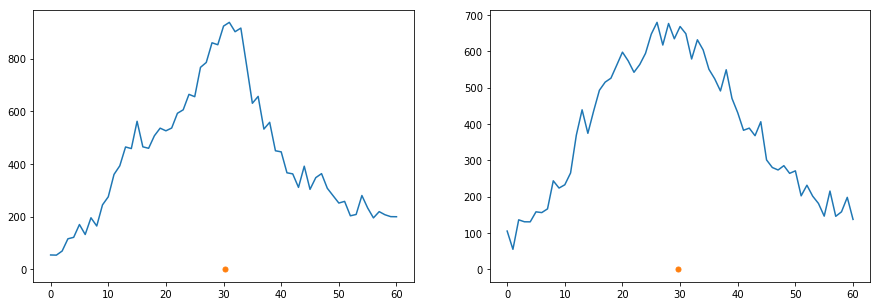

In [31]:
#galaxy core...PART TWO  ##SPACE CORE
#USING SECTIONS SURROUNDING OIII WL RANGE
print('flux_data shape',np.shape(flux_data))#(226,4104) #note that this is missing those 10 wl's
#also note flux_data is continuum subtracted

space_pix_correction = target_aperature[0] 


#making arrays surrounding OIII
upperOIII = 740
lowerOIII = 730
width_sections = 25
upper_one = lowerOIII - 1 #just to give it some distance
lower_one = upper_one - width_sections
lower_two = upperOIII + 1 #needed more distance (near&below core H-alpha leaks into this range so IF change ha range then make this 5 a 1 )
upper_two = lower_two + width_sections
first_section = flux_data[:,lower_one:upper_one]
second_section = flux_data[:,lower_two:upper_two]
print('shape of first section:', np.shape(first_section), 'matches shape of second section:', np.shape(second_section))
#plt.plot(second_section[120]); #tried many diff row values for both sections here - satisified correct


#collapsing both sections in the spatial direction (histogram like)
first_section_sum = np.sum(first_section,axis=1) 
first_section2d = first_section_sum[:,np.newaxis] #2d required to centroid
second_section_sum = np.sum(second_section,axis=1)
second_section2d = second_section_sum[:,np.newaxis] #2d required to centroid
print('shape of first section 2d:', np.shape(first_section2d))
print('shape of second section 2d:', np.shape(second_section2d))


#does the centroiding
x_first, y_first = centroid_com(first_section2d)
x_second, y_second = centroid_com(second_section2d)
print('first section centroid x,y:',x_first,y_first)
print('second section centroid x,y:',x_second,y_second)



#verify by plots
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.plot(first_section2d);
ax2.plot(second_section2d);
#note below had to reverse xy centroids to visualize correctly, not sure why it inverted tho...
ax1.plot(y_first,x_first, '.', markersize=10)
ax2.plot(y_second,x_second, '.', markersize=10)

#averaging the two core values, the y's
core_array = np.array([y_first,y_second])
core_avgcentroids = np.mean(core_array)
print('This is the average pixel value of the core BEFORE spatial cutout corrections',core_avgcentroids)

#corrections to pixel value of avg section core
core_from_sections = core_avgcentroids + space_pix_correction #corrects for spatial axis target cutout
print('Pixel Value of core along spatial axis wrt full CCD size',core_from_sections)

## Centroiding OIII in target ST-1

In [32]:
#below for reference, uses full ccd wl range - first defined when applied DS
wl = np.array(ds_blue10.pixtowl(np.arange(len(subimg2.data.T[::][0]))))
wl_shorter2 = wl[730:740] #isolate wl around h-alpha using full ccd plate wl range formerly 1387:1400
new_short = flux_data[:,730:740]
wl_pix_correction_wo_oscill = target_wl_range[0] - wl_pix_correction #wl_pix_correction is the oscillations

means_unc=[]
means=[]
print('should be blank',means)
stddev = []
gfit_vals = []
mylist2 = []
mylist_ys2 = []
holding2 = []
ha_wls2 = []


#gets OIII centroids in target gal's range
for row in new_short: 
    #calculates centroids per row
    flux_fake2d2 = row[np.newaxis, :] #makes each row array into a fake2d
    #print('row?',flux_fake2d2)
    mylist4, mylist5 = centroid_com(flux_fake2d2)#finds center(x,y) of halpha for each row array
    #print(mylist4) #, mylist5)
    #holding_arr2 = row, wl_shorter2
    #xarr = np.array([row,wl_shorter2])
    mylist_ys2.append(mylist5)
    mylist2.append(mylist4) #collects all halpha centers/centroids per row
    
    #calculating errors per row via gaussian fit
    x = ar(range(len(row)))
    y = row
    mean = mylist4
    g_init = models.Gaussian1D(amplitude=max(y), mean=mean, stddev=2.)
    fit_g = fitting.LevMarLSQFitter()
    gaussian = fit_g(g_init, x, y)
    #print('mean', gaussian.mean)
    means.append(gaussian.mean.value)
    gfit_vals.append(gaussian)
    stddev.append(gaussian.stddev.value) #
    
    #trying to get uncertainities per row via covariance matrix
    gaussian.param_cov = fit_g.fit_info['param_cov']
    #mytest = fit_g.fit_info['param_cov'][1][1]
    means_unc.append(fit_g.fit_info['param_cov']) #save the whole matrix and extract middle term via for loop below
    #means_unc.append(fit_g.fit_info['param_cov'][1][1]) #dont know why this doesnt work
    
 #end of for loop   
gfit_vals = np.array(gfit_vals) 
#print(mytest)
print('lenght of means_unc is:', len(means_unc))
#print('means_unc type',type(means_unc),'means_unc', means_unc) #gaussian.param_cov)
stddev = np.array(stddev)
means = np.array(means)
mylist2=np.array(mylist2) #halpha centroids (wl) array
print('mylist2:',mylist2)
print('mean shape',np.shape(means),means)
gaussian_specpix_fullccd = means + stddev + wl_pix_correction + target_wl_range[0] #not sure b/c +stddev would be max gauss val
centroid_specpix_fullccd = mylist2 + wl_pix_correction + target_wl_range[0] #1285 for spectral direction, 105 for spatial direction




should be blank []


lenght of means_unc is: 61
mylist2: [ 2.80124716  2.0181789   4.23563111  3.34284328  4.20753603  4.83173546
  4.94239273  4.90051035  4.59409083  4.13651542  3.87114234  3.92788126
  5.16618256  4.61620862  4.26829974  4.35658675  3.78253189  4.91091813
  4.77528815  4.19540889  4.60298759  4.35981713  4.46261117  4.30727132
  4.72071716  4.40832733  3.96538868  4.26058624  4.29510559  4.3184825
  4.24810479  4.10323225  4.47903877  5.0641551   4.33648878  4.23647855
  4.5485793   4.94088546  4.49241687  4.45270036  5.12773848  4.26455193
  4.52546494  3.99547058  4.41480689  5.00236669  4.03310236  3.24353401
  3.75600299  3.30267303  2.6594381   4.92020849  4.02616845  3.99780984
  3.63532918  7.00948848  4.37913711  4.12166712  2.83247697  3.43888411
  3.18876762]
mean shape (61,) [  2.22961306e+00   1.39778243e+00   3.78330456e+00  -9.24303327e+01
   4.55078265e+00   3.74484014e+00   5.46935686e+00   4.95892921e+00
   5.62444743e+02   3.90835126e+00   3.26646487e+00   2.68188622e+

In [33]:
#explorations to help atlas overlayed on arc plot

wl = np.array(ds_blue10.pixtowl(np.arange(len(subimg2.data.T[::][0]))))
print(np.shape(wl),len(subimg2.data.T[::][0]), len(wl),np.arange(len(subimg2.data.T[::][0])))
#for i in wl:
#    print(wl) #get lots of arrays of length 2835 (correct) with values of 5837.335 - 2799.945

(2835,) 2835 2835 [   0    1    2 ..., 2832 2833 2834]


In [34]:
#helps me find a badmatrix index for use in below cell


print('whole array type',type(means_unc))
means_unc = np.array(means_unc)
print('whole array new type', type(means_unc))
print(means_unc[47:49])
print('array 48 of means_unc type',type(means_unc[48]), 'array 48',means_unc[48])

matrix = np.arange(0,len(means_unc),1)


for i in matrix:
    if np.any(means_unc[i]) == float:
        print('results',i)

whole array type <class 'list'>
whole array new type <class 'numpy.ndarray'>
[ array([[ 17.02010741,   1.02423042,  -3.48033604],
       [  1.02423042,   1.80046267,  -1.21364124],
       [ -3.48033604,  -1.21364124,   2.27112341]])
 array([[ 17.13225476,  -3.98175408,  -2.45064079],
       [ -3.98175408,  29.68214131, -23.48414937],
       [ -2.45064079, -23.48414937,  25.15980623]])]
array 48 of means_unc type <class 'numpy.ndarray'> array 48 [[ 17.13225476  -3.98175408  -2.45064079]
 [ -3.98175408  29.68214131 -23.48414937]
 [ -2.45064079 -23.48414937  25.15980623]]


In [35]:
#takes out unc value from each matrix
#exploring means_unc problem/solution


#print('10',type(means_unc[10]))

#determining which index of matrix value i want
#print(np.shape(means_unc), 'MATRIX', means_unc[1],'SECOND ROW', means_unc[1][1], 'MIDDLE',means_unc[1][1][1])
print('possible problem matrix here',means_unc[10])

#setting up indexing array to explore all the matrices in for loop
matrix = np.arange(0,len(means_unc),1)
#print('matrix length array', matrix)

badmatrix = np.array([ 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0])
badmatrix = np.reshape(badmatrix,(3,3))
#print('shape',np.shape(badmatrix),'middle index',badmatrix[1][1])

unc = []
uncs = [] 
badvalues = []  
    
for i in matrix:
    #np.array([means_unc])
    #empty == type(np.any(means_unc[10])) #np.bool
    #print('empty',empty)
    if np.any(means_unc[i]) == None:
        print('bad matrix at array:',i)
        badvalues.append(i)
        for j in badvalues:
            means_unc[j] = badmatrix
            ##uncs.append(means_unc[j][1][1])
            #print('one replaced uncs',uncs)
            #print('replaced with', means_unc[j])
            #print('right index?', means_unc[j][1][1])
            #print('replaced type',type(means_unc[j]))
    else:
        np.all(means_unc[i]) == np.all(means_unc[i])
        #print('reg type',type(means_unc[i]),'i=',i) #np.ndarray
    uncs.append(means_unc[i][1][1]) #does same as below
    #print('one original uncs',uncs)
    
unc.append(uncs) #does same as above
print('unc',np.shape(unc),len(unc),'uncs',np.shape(uncs),len(uncs))
print('uncs best b/c of shape but unc or uncs are both same array of middle term from matrices....ie sigma**2')

possible problem matrix here [[ 5.12460652  0.34726393 -1.59769098]
 [ 0.34726393  0.76037921 -0.44484716]
 [-1.59769098 -0.44484716  1.28232406]]
bad matrix at array: 3
bad matrix at array: 8
bad matrix at array: 12
bad matrix at array: 18
bad matrix at array: 20
bad matrix at array: 24
bad matrix at array: 28
bad matrix at array: 30
bad matrix at array: 34
bad matrix at array: 36
bad matrix at array: 37
bad matrix at array: 42
bad matrix at array: 43
bad matrix at array: 45
bad matrix at array: 46
bad matrix at array: 49
bad matrix at array: 60
unc (1, 61) 1 uncs (61,) 61
uncs best b/c of shape but unc or uncs are both same array of middle term from matrices....ie sigma**2


(61,)
sigma_gauss 61 (61,) [1.113886475553754, 5327.895330463544, 2.296961965462351, 10.0, 1.1093330836099498, 0.5514655954550725, 1.3956408047505617, 0.5563044905403629, 10.0, 0.630828934645455, 0.8719972515666954, 2.7172869463013076, 10.0, 0.5052512687380237, 0.76670989644086, 1.101745208273353, 1.5492976987362375, 2.292177146505746, 10.0, 3.8596425756662813, 10.0, 2.3630833111777183, 0.6242983804789121, 1.6937597716140067, 10.0, 105.25036587761733, 2.457013074415187, 26.10433959998526, 10.0, 1.2644856708537349, 10.0, 1.1108259026247873, 1.0124217648337113, 45.502177519914696, 10.0, 79.18320384942017, 10.0, 10.0, 2.1164235364489725, 3.948081837576694, 0.4264203061489788, 3.7930785555313644, 10.0, 10.0, 1.7571626466312593, 10.0, 10.0, 1.3418132035648476, 5.448131910372789, 10.0, 8.978942530017804, 3.1054918757584806, 2.2176740064455815, 0.7339571509970091, 2.3132030532303904, 0.865082801180171, 0.7896190477884009, 10.231029137937513, 1.464017797018459, 0.8720995467258251, 10.0]
wl_pix

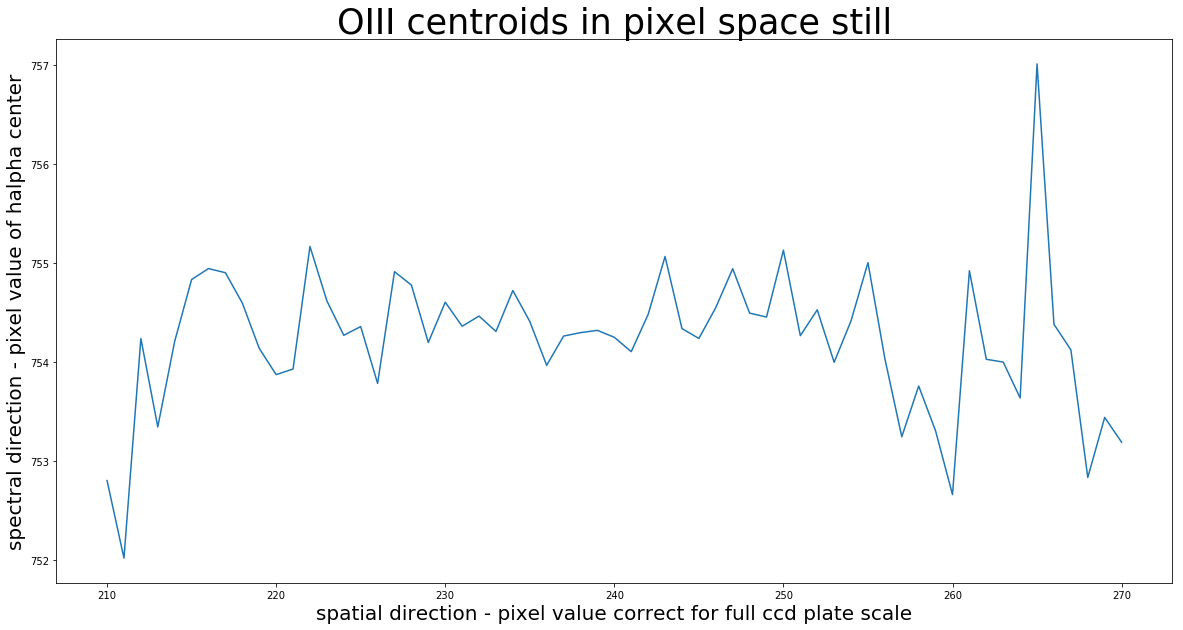

In [36]:
#gets uncertainity from matrix value (still in pixel space)

#taking sqrt of unc to get a true sigma

uncs = np.array(uncs)
print(np.shape(uncs))

sigma_gauss = []
for i in uncs:
    sigma = m.sqrt(abs(i))
    sigma_gauss.append(sigma)
sigma_gauss
print('sigma_gauss',len(sigma_gauss),np.shape(sigma_gauss),sigma_gauss)

#correction for target wl pix's to match index of full ccd plate pix's (still not correct len but dont care about below target pixs-no data there neway)
#1386 correction b/c thats the cut used for new_short when isolating ha due to 10 pix initial cut
wl_pix_corrected = mylist2 + wl_pix_correction + target_wl_range[0] #decide how to better automate/track this
print('wl_pix_corrected defined here')
#dont have to account for osciallations b/c used full ccd plate range b4 wl cut 4 h-alpha isolation
space_pix_correction2 = np.arange(len(mylist2)) + space_pix_correction #centroids

print('mylist2','len=',len(mylist2),type(mylist2), np.shape(mylist2))
print('space_pix_correction2','len=',len(space_pix_correction2),type(space_pix_correction2), np.shape(space_pix_correction2))
print('stddev',np.shape(stddev))
 
    
#plotting
plt.figure(figsize=(20,10))
plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
plt.ylabel('spectral direction - pixel value of halpha center',fontsize=20)
plt.plot(space_pix_correction2,wl_pix_corrected)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
plt.title('OIII centroids in pixel space still',fontsize=35)
#plt.ylim(1393,1405)

## trying other emission lines nearby to find correct z (SL)-------------------------------------------

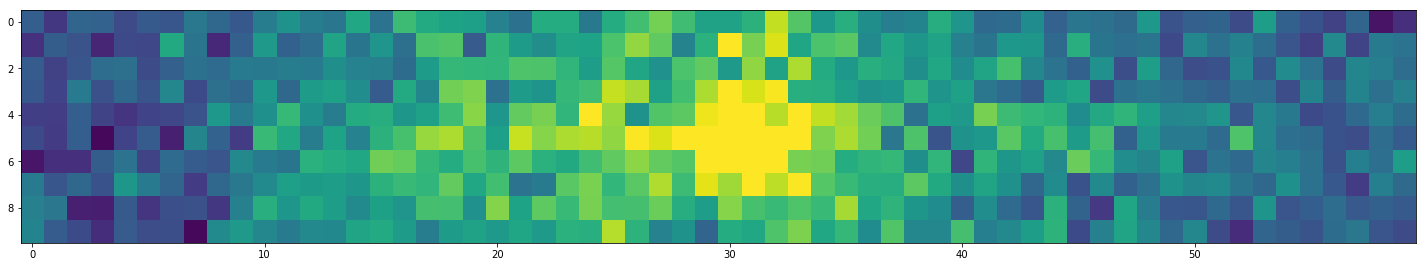

In [37]:
#2nd emission going down (first line thought to be 3727 is the top line in this scheme)
plt.figure(figsize=(25,25))
#testingthis=subimg2.data[1363:1378,155:280] #[spectralrange,spatialrange]#for blue side
testingthis=subimg2.data[774:784,210:270] 


vmin=-10
vmax=45
plt.imshow(testingthis,vmin=vmin,vmax=vmax)
target_wl_range_SL=(774,784)

In [38]:
#reusing core b/c this is a quick estimate
#CENTROIDING

wl_SL = np.array(ds_blue10.pixtowl(np.arange(len(subimg2.data.T[::][0]))))
wl_shorter2_SL = wl[774:784] #isolate wl around h-alpha using full ccd plate wl range formerly 1387:1400
new_short_SL = flux_data[:,774:784]
wl_pix_correction_wo_oscill_SL = target_wl_range_SL[0] - wl_pix_correction #wl_pix_correction is the oscillations

means_unc_SL=[]
means_SL=[]
print('should be blank',means_SL)
stddev_SL = []
gfit_vals_SL = []
mylist2_SL = []
mylist_ys2_SL = []
holding2_SL = []
ha_wls2_SL = []


#gets OIII centroids in target gal's range
for row in new_short_SL: 
    #calculates centroids per row
    flux_fake2d2_SL = row[np.newaxis, :] #makes each row array into a fake2d
    mylist4_SL, mylist5_SL = centroid_com(flux_fake2d2_SL)#finds center(x,y) of halpha for each row array
    mylist_ys2_SL.append(mylist5_SL)
    mylist2_SL.append(mylist4_SL) #collects all halpha centers/centroids per row
    
    #calculating errors per row via gaussian fit
    x = ar(range(len(row)))
    y = row
    mean_SL = mylist4_SL #uses centroid to guess avg for gauss model
    g_init_SL = models.Gaussian1D(amplitude=max(y), mean=mean_SL, stddev=2.)
    fit_g_SL = fitting.LevMarLSQFitter()
    gaussian_SL = fit_g_SL(g_init_SL, x, y)
    means_SL.append(gaussian_SL.mean.value)
    gfit_vals_SL.append(gaussian_SL)
    stddev_SL.append(gaussian_SL.stddev.value) #
    
    #trying to get uncertainities per row via covariance matrix
    gaussian_SL.param_cov = fit_g_SL.fit_info['param_cov']
    means_unc_SL.append(fit_g_SL.fit_info['param_cov']) #save the whole matrix and extract middle term via for loop below
    
 #end of for loop   
gfit_vals_SL = np.array(gfit_vals_SL) 
#print(mytest)
print('lenght of means_unc is:', len(means_unc_SL))
#print('means_unc type',type(means_unc),'means_unc', means_unc) #gaussian.param_cov)
stddev_SL = np.array(stddev_SL)
means_SL = np.array(means_SL)
mylist2_SL=np.array(mylist2_SL) #halpha centroids (wl) array
print('mylist2:',mylist2_SL)
print('mean shape',np.shape(means_SL),means_SL)
gaussian_specpix_fullccd_SL = means_SL + stddev_SL + wl_pix_correction + target_wl_range_SL[0] #not sure b/c +stddev would be max gauss val
centroid_specpix_fullccd_SL = mylist2_SL + wl_pix_correction + target_wl_range_SL[0] #1285 for spectral direction, 105 for spatial direction




should be blank []


lenght of means_unc is: 61
mylist2: [  8.94447959  10.30598534   3.56796529   4.6798443    6.30114375
  -1.56865633   2.57116655   3.75644068   3.04830535   4.61757383
   5.28138785   4.76640042   5.57805133   4.34481502   4.64482298
   4.58418382   4.58857132   4.91556181   4.8691738    4.06056303
   4.88190037   4.60856183   4.32912882   4.78607634   4.46997403
   4.24471962   4.45210454   4.43599143   4.59393192   4.76978024
   4.06798442   4.52860189   4.67152395   4.78796186   4.22363829
   4.75762602   4.42864179   4.287698     4.85348479   4.56953031
   4.52598896   4.61651277   5.25959005   4.24768606   4.39398132
   4.80832141   4.37294465   4.9346096    4.32466128   4.05090305
   4.02365894   4.35645585   4.03702487   4.53917561   4.58290596
   3.77769986   4.98294134   3.67698278   6.29551823   3.7534152
   4.61313003]
mean shape (61,) [  6.38718652e+00   8.84346483e+00   3.58453529e-01   5.12184882e+00
   7.65969482e+00  -3.00139280e+00  -5.80683272e+01  -1.21653421e+02
   

wl_pix_corrected defined here


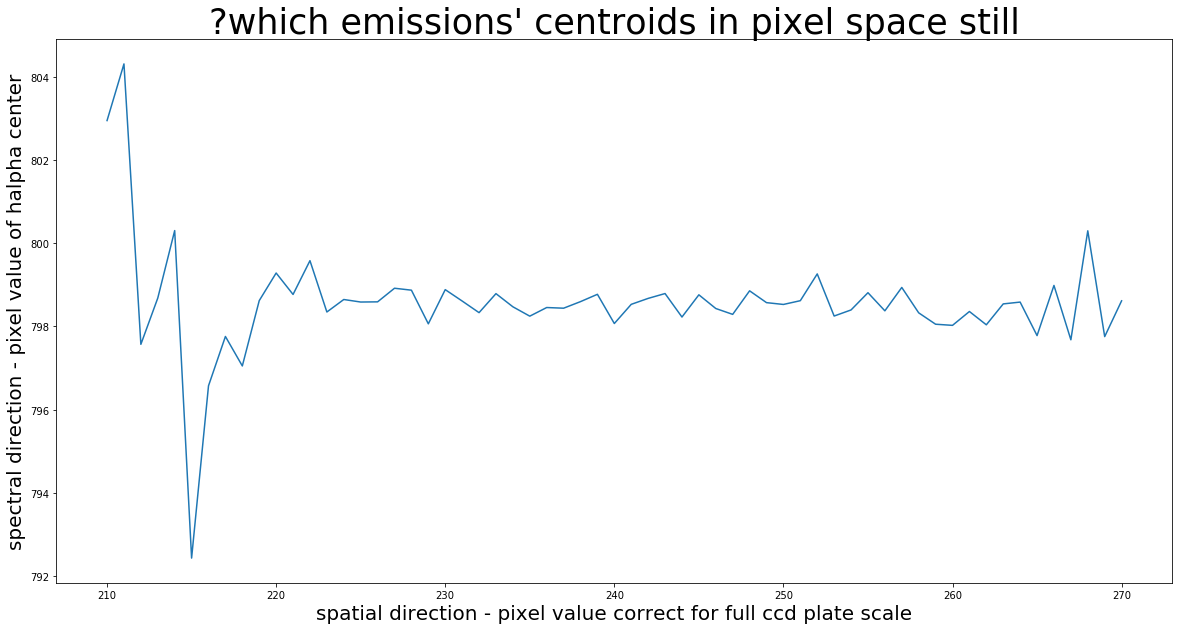

In [39]:
wl_pix_corrected_SL = mylist2_SL + wl_pix_correction + target_wl_range_SL[0] #decide how to better automate/track this
print('wl_pix_corrected defined here')
#dont have to account for osciallations b/c used full ccd plate range b4 wl cut 4 h-alpha isolation
space_pix_correction2_SL = np.arange(len(mylist2_SL)) + space_pix_correction #centroids

#print('mylist2','len=',len(mylist2_SL),type(mylist2_SL), np.shape(mylist2_SL))
#print('space_pix_correction2','len=',len(space_pix_correction2),type(space_pix_correction2), np.shape(space_pix_correction2))
#print('stddev',np.shape(stddev))
 
    
#plotting
plt.figure(figsize=(20,10))
plt.xlabel("spatial direction - pixel value correct for full ccd plate scale",fontsize=20)
plt.ylabel('spectral direction - pixel value of halpha center',fontsize=20)
plt.plot(space_pix_correction2_SL,wl_pix_corrected_SL)#(spaital pix index,corrected "wl" of centroid values (still in pix space))
plt.title("?which emissions' centroids in pixel space still",fontsize=35)



## RED SIDE TRY TO GET RIGHT Z -------------------------------------------

In [40]:
#FIRST GET HOST Z REDSHIFT

#good

#calculating z of host
#distance = (c*z)/hubbleconst so need --> (dist * h0) / c = z
distance = 37.7*u.Mpc #host dist from saga paper
H0 = 70 * u.km / u.s / u.Mpc #hubble const
c = const.c.to('km/s') #speed of light
host_z = (distance * H0)/ c 
host_z_vel = ((distance * H0)/ c ) *c

print('StarTrek-host redshift:',host_z)
print('StarTrek-host velocity:',host_z_vel)

StarTrek-host redshift: 0.008802756472279233
StarTrek-host velocity: 2639.0 km / s


# StarTrek -2
# .
# .
#

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


5 target files located
choose 2D spec for blueside
choose 1D target spec axis limits for blueside


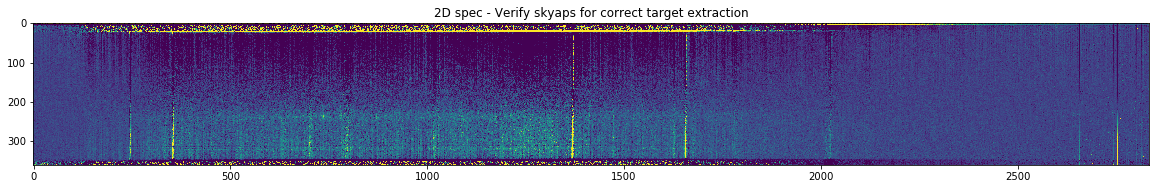

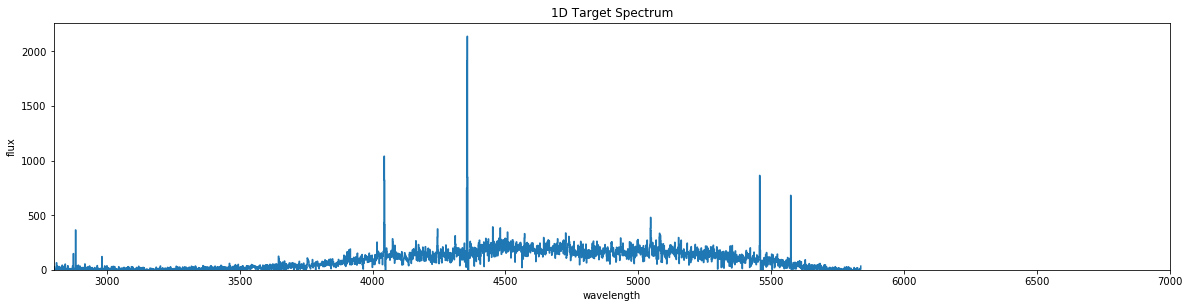

In [41]:
#BLUE

#naming files needed
targetID_blue10_ST2 = '57607497515484-StarTrek'
skyaps_blue10 = [(160,200),(285,355)]
all_side_files_target = 'DoubleSpec/20170519/blue*.fits' #redside
vmax=40
vmin=-10
model='linear'
flatid='DomeFlat'
specaps=(215,250)
flux_ST2,unc_ST2,subimg_ST2 = pipeline.sky_subtract(targetID_blue10_ST2,skyaps_blue10,ds_blue10,all_side_files_blue10,atlasfiles_blue10,all_side_files_target,flatid,specaps,vmax,vmin,model)

#turning 1d spec into a table to save as fits file
ST_2_blue = Table([flux_ST2,unc_ST2], names=('flux','unc'))




/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


5 target files located


choose 2D spec for redside
choose 1D target spec axis limits for redside


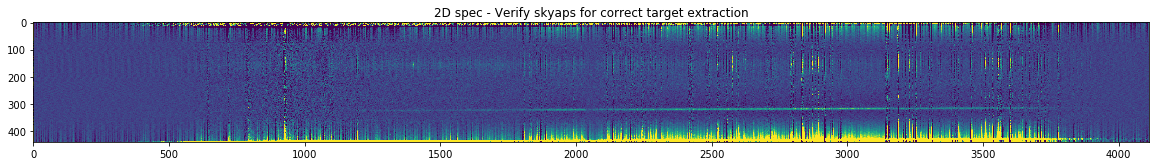

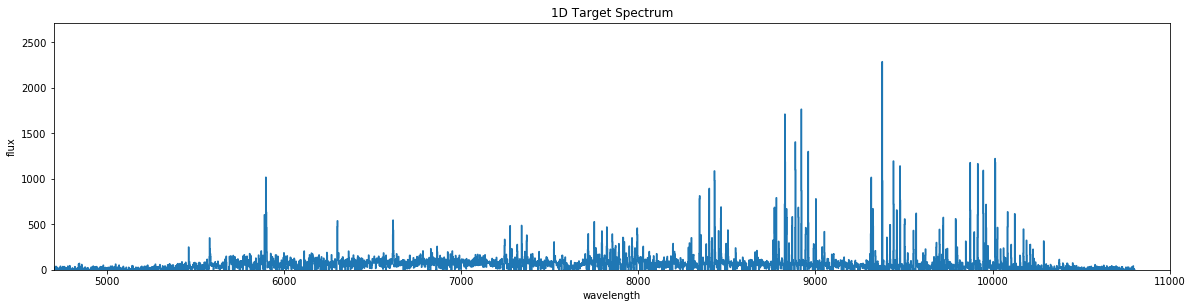

In [42]:
#RED----lots of noise maybe have to ask erik b/c it wont be perfect with wrong ds but this bad?


#this ones interesting b/c the raw files show single skinny spectra (looks like a star) only and pixel locations
#dont match this image produced to determine specaps, target too faint unless stacked and raw vs this inverted
#ie stars spec on raw ~100s, on this ~300s



targetID_red10_ST2 = '57607497515484-StarTrek'
skyaps_red10 = [(75,110),(210,355)]
all_side_files_target = 'DoubleSpec/20170519/red*.fits' #redside
specaps=(130,170)
model=('poly',4)
flux_ST2_red,unc_ST2_red, comb_ST2_red = pipeline.sky_subtract(targetID_red10_ST2,skyaps_red10,ds_red10,all_side_files_red10,atlasfiles_red10,all_side_files_target,flatid,specaps,vmax,vmin,model)

# Starting 2nd reduction technique for rot.curves ST-2
## Uses Blue side OIII line

(100, 3000)

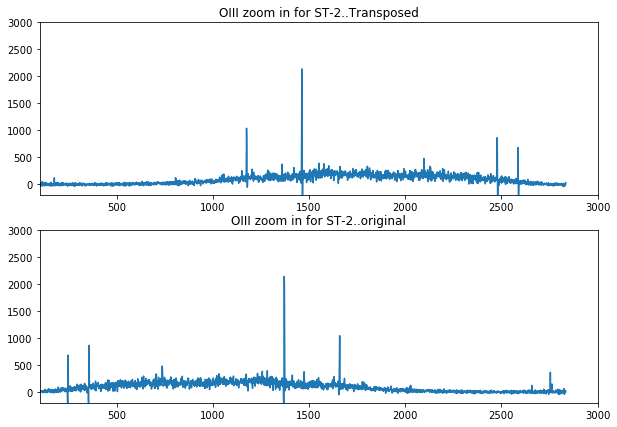

In [43]:
#quick spectral pix range estimate from 1D spectrum-FIRST FULL SPECTRUM TO ORIENT CORRECTLY
#plt.figure(figsize=(10,2))
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,7))

plt.axes(ax1)
#fig, ax1 = plt.subplots(figsize=(10, 2))
flux_ST2_T = flux_ST2.T[::-1] #transposes array so spectral direction fits redside
plt.plot(flux_ST2_T)
plt.title('OIII zoom in for ST-2..Transposed')
plt.ylim(-200,3000)
#plt.xlim(1365,1374) #1287-1295
plt.xlim(100,3000)

plt.axes(ax2)
#fig, ax2 = plt.subplots(figsize=(10, 2))
plt.plot(flux_ST2)
plt.title('OIII zoom in for ST-2..original')
plt.ylim(-200,3000)
plt.xlim(100,3000)

(1460, 1465)

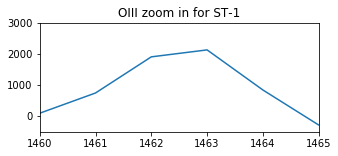

In [44]:
#quick spectral pix range estimate from 1D spectrum- NOW ZOOM IN ON EMISSION LINE
plt.figure(figsize=(5,2))
plt.plot(flux_ST2_T)
plt.title('OIII zoom in for ST-1')
plt.ylim(-500,3000)
plt.xlim(1460,1465) 

In [45]:
#setup to extract 2D only (uses pipeline modification)


#stacking all those instrument-noise-subtracted target data files-help increase s/n 
atlasfiles = fits.open('fear.fits') #use for creating dispersion solution later 

#determing what instumentation noise is
flats = [reduce_dblspec.DoubleSpecImage(fn).overscan_sub_and_trim() for fn in 
          reduce_dblspec.find_all_obj(flatid,'DoubleSpec/20170519/blue*.fits')[:10]] #DO I WANNA KEEP AS ONLY LAST 10???
nfl = reduce_dblspec.create_normalized_flat(flats)   
header = atlasfiles[0].header    
    
#locating all files w/ the target & instrumentation noise subtraction
specs_ST2 = [reduce_dblspec.DoubleSpecImage(fn).overscan_sub_and_trim().flatten(nfl) 
          for fn in reduce_dblspec.find_all_obj(targetID_blue10_ST2,all_side_files_target_blue)]
#specs is the inst. noise subtracted group of files with data from target    
    
print("This is lenspecs:",len(specs_ST2))
comb_ST2 = reduce_dblspec.combine_imgs(specs_ST2) #comb-all files data from target stacked
#model=('poly',3)
model=('linear')


subimg2_ST2, comb2_ST2, fitmodels_ST2 = sky_subtract(comb_ST2,skyaps_blue10,model)
#subimg2 is sky-subtracted, instumentation noise subtracted, 

/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:88: UserWarning: ROISEC is not one of the values this pipeline assumes.It may not work right where specific values are used (e.g., creating master flats
  warn("ROISEC is not one of the values this pipeline assumes."
/Users/dee/Desktop/data_pipeline/reduce_dblspec.py:256: RuntimeWarning: invalid value encountered in sqrt
  unc = (result/self.header['GAIN'] + self.unc[tsl]**2)**0.5


This is lenspecs: 5


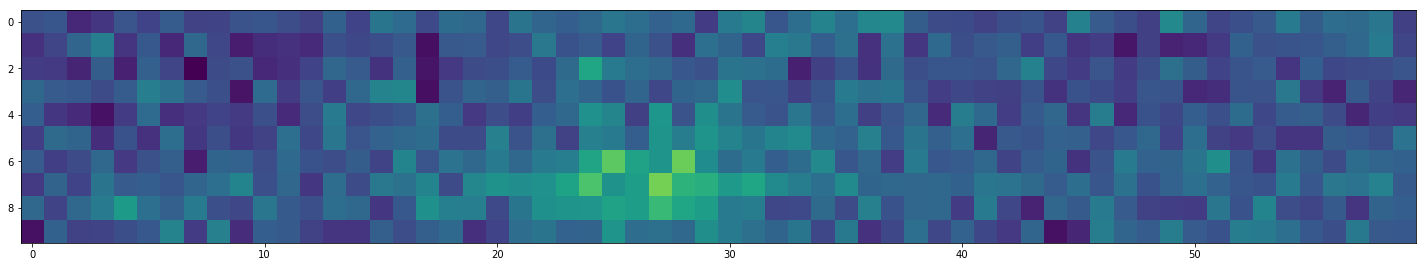

In [46]:
#2d ha region in pixels (from pipeline modification)

plt.figure(figsize=(25,25))
#testingthis=subimg2.data[1363:1378,155:280] #[spectralrange,spatialrange]#for blue side
testingthis_ST2=subimg2_ST2.data[730:740,210:270] 


vmin=-10
vmax=45
plt.imshow(testingthis_ST2,vmin=vmin,vmax=vmax)
#print('SPECTRAL H-alpha wl range in pix: 1289:1295;') #w/o missing 3 wl's , to use with flux data - 3
#print('SPACE Target spatial range in pix space: 105:195')